# Spring 2021 -> INSY 5377 - Web & Social Analytics
## Project work
### Team Members: Phanikrishna Karanam, Swetha Gollamudi, Haripriya Jujjavarapu

#### Analytics on Bangalore Restaurants

__Objective__: Perform Exploratory Data Analysis and build a model that predicts whether a restaurant is Successfull or not. 

__Executive Summary__: Below are the business questions we will be answering as part of our project: 

 - 1)	What are the top restaurant chains in Bangalore?
 - 2)	Where are the top rated restaurants located?
 - 3)	What type of restaurants are more popular?
 - 4)	What is the average rating of top rated restaurants?
 - 5)	What is average cost of meal for two patrons in a successful restaurant?
 - 6)	Would an option of online ordering be a critical factor in determining restaurants rating?
 - 7)	Would the ability to reserve table at a restaurant contribute to overall restaurant’s success? 
 - 8)	What cuisines are the top rated restaurants offering? 
 - 9)	What makes a restaurant successful?

Finally, we also build a model using Machine Learning and Neural Network techniques that would be able to successfully predict whether a restaurant would be successful or not. 

__Overview on this notebook__:
Used concepts and techniques learnt during the Web & Social Analytics, Deep Learning and Data Science class, to build models that reasonably classify restaurants as “Successful / Not Sucessful”. 
 - Perform Exploratory Data Analysis using visualization 
 - Preprocess the data 
 - Explore Deep Learning and traditional Machine Learning classification algorithms 
 - Analyze the metrics and tune hyper parameters to improve model performance
 - Test against the hold out sample for generalization evaluation
 - Dispaly model performance summary stats 
 
__Dataset Source:__ https://drive.google.com/file/d/1QIR4gV0G-jtWL_pr_en7JjEHwzhaxVCZ/view

In [1]:
import os
import warnings

warnings.filterwarnings('ignore')
os.chdir('C:/MSBA/Spring 2021/INSY 5377 - Web & Social Analytics/Project')

In [2]:
import pandas as pd

# set below options to review complete DataFrame in output cells
# Note: load time and processing will be higher
pd.set_option('max_rows', 300)
pd.set_option('max_columns', None)
#pd.set_option('max_colwidth', -1)

In [3]:
data_df = pd.read_csv('zomato_reduced.csv', encoding='utf-8')
data_copy = data_df.copy()
print('Shape: ', data_df.shape)
data_df.head()

Shape:  (9253, 21)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),liked_food_from_review,menus_combined,location_latitude,location_longitude
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,"['fried rice', 'soya chaap', 'kulcha', 'rice',...","['pasta,', 'lunch', 'buffet,', 'masala', 'papa...",12.915382,77.573638
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787.0,080 41714161,Banashankari,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,"['chicken', 'fried rice', 'chicken biryan', 'c...","['momos,', 'lunch', 'buffet,', 'chocolate', 'n...",12.915382,77.573638
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","churros, cannelloni, minestrone soup, hot choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,"['veggies', 'egg', 'pasta', 'cake', 'chocolate...","['churros,', 'cannelloni,', 'minestrone', 'sou...",12.915382,77.573638
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88.0,+91 9620009302,Banashankari,Quick Bites,masala dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,"['pulka', 'apple', 'rice with sambar', 'dosa',...","['masala', 'dosa', 'pulka', 'apple', 'rice wit...",12.915382,77.573638
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"panipuri, gol gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,"['roti', 'noodles', 'kulcha', 'pav bhaji', 'pa...","['panipuri,', 'gol', 'gappe', 'roti', 'noodles...",12.941726,77.575502


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9253 entries, 0 to 9252
Data columns (total 21 columns):
url                            9253 non-null object
address                        9253 non-null object
name                           9253 non-null object
online_order                   9253 non-null object
book_table                     9253 non-null object
rate                           9253 non-null float64
votes                          9253 non-null float64
phone                          9116 non-null object
location                       9253 non-null object
rest_type                      9216 non-null object
dish_liked                     4545 non-null object
cuisines                       9250 non-null object
approx_cost(for two people)    9253 non-null float64
reviews_list                   9253 non-null object
menu_item                      9253 non-null object
listed_in(type)                9253 non-null object
listed_in(city)                9253 non-null object
liked_

In [5]:
# Drop if any duplicate rows are present for same restaurants 

data_df = data_df.drop_duplicates(subset=['address', 'name']).reset_index().drop('index', axis=1)
print('Shape: ', data_df.shape)

Shape:  (9253, 21)


In [6]:
data_df.isnull().sum()

url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                              0
votes                             0
phone                           137
location                          0
rest_type                        37
dish_liked                     4708
cuisines                          3
approx_cost(for two people)       0
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
liked_food_from_review            0
menus_combined                 4708
location_latitude                 0
location_longitude                0
dtype: int64

In [7]:
data_df = data_df.dropna(subset = ['rest_type','cuisines'])
drop_columns = ['url','phone','location','dish_liked','menu_item','listed_in(type)','liked_food_from_review',
                'menus_combined', 'location_latitude','location_longitude']
data_df = data_df.drop(drop_columns, axis = 1)

In [8]:
data_df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(city)                0
dtype: int64

In [9]:
# review the unique values in all the categorical columns to see if we can one hot encode / label encode them

features_cat = data_df.select_dtypes(include='object').columns
features_cat

Index(['address', 'name', 'online_order', 'book_table', 'rest_type',
       'cuisines', 'reviews_list', 'listed_in(city)'],
      dtype='object')

In [10]:
features_cat = ['online_order', 'book_table', 'listed_in(city)']  

for col in features_cat:
    print('\n{} has {} unique values: \n{}'.format(col, data_df[col].nunique(), data_df[col].unique()))
    
print('\nCombination of rest_types has {} unique values: \n{}' \
       .format(data_df['rest_type'].nunique(), data_df['rest_type'].unique()))

# Let us look at unique restaurant types
rest_types = data_df['rest_type'].to_list()
unique_rest_types = {types.strip() for i in rest_types for types in str(i).split(',')}
print('\nrest_types has {} unique values: \n{}'.format(len(unique_rest_types), list(unique_rest_types)))

# Let us look at unique cuisine types
cuisines = data_df['cuisines'].to_list()
unique_cuisines = {cuisine.strip() for i in cuisines for cuisine in str(i).split(',')}
print('\ncuisines has {} unique values: \n{}'.format(len(unique_cuisines), list(unique_cuisines)))


online_order has 2 unique values: 
['Yes' 'No']

book_table has 2 unique values: 
['Yes' 'No']

listed_in(city) has 30 unique values: 
['Banashankari' 'Bannerghatta Road' 'Basavanagudi' 'Bellandur'
 'Brigade Road' 'Brookefield' 'BTM' 'Church Street' 'Electronic City'
 'Frazer Town' 'HSR' 'Indiranagar' 'Jayanagar' 'JP Nagar' 'Kalyan Nagar'
 'Kammanahalli' 'Koramangala 4th Block' 'Koramangala 5th Block'
 'Koramangala 6th Block' 'Koramangala 7th Block' 'Lavelle Road'
 'Malleshwaram' 'Marathahalli' 'MG Road' 'New BEL Road' 'Old Airport Road'
 'Rajajinagar' 'Residency Road' 'Sarjapur Road' 'Whitefield']

Combination of rest_types has 86 unique values: 
['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Cafe, Quick Bites' 'Delivery' 'Mess'
 'Dessert Parlor' 'Bakery, Dessert Parlor' 'Pub' 'Bakery'
 'Takeaway, Delivery' 'Fine Dining' 'Beverage Shop' 'Sweet Shop' 'Bar'
 'Dessert Parlor, Sweet Shop' 'Bakery, Quick Bites'
 'Sweet Shop, Quick B

In [11]:
# Few records were having Afghani as cuisine name while others had Afghan. Converting all of those to Afghan
data_df.loc[data_df['cuisines'] == 'North Indian, Afghani, Mughlai', 'cuisines'] = 'North Indian, Afghan, Mughlai'
data_df.loc[data_df['cuisines'] == 'North Indian, Afghani', 'cuisines'] = 'North Indian, Afghan'

# create new column for number of cuisines offered
data_df['# of cuisines'] = data_df['cuisines'].map(lambda x: len(str(x).split(',')))

In [12]:
# Bin the Ratings into different categories. We will use Ratings as a Target variable during model building

rating_bins = [0,4,5.01]
rating_labels = [0,1]
data_df['rate_cat'] = pd.cut(data_df['rate'], bins = rating_bins, labels = rating_labels, right=False)

# Let us convert the categorical variable to numeric (for model build)
data_df['rate_cat'] = data_df['rate_cat'].cat.codes

data_df['rate_cat'].value_counts()

0    7117
1    2096
Name: rate_cat, dtype: int64

In [13]:
# Bin the approximate cost values into different categories

bin_range = [0,250,500,750,1000,1500,2000,6000]
cost_labels = [0,1,2,3,4,5,6]
data_df['cost_cat'] = pd.cut(data_df['approx_cost(for two people)'], bins = bin_range, labels=cost_labels, right = False)
data_df['cost_cat'].value_counts()

1    3793
2    2282
0    1401
3     747
4     576
5     251
6     162
Name: cost_cat, dtype: int64

In [14]:
# Bin the number of votes into different categories based on quartile ranges

votes_labels = [0,1,2,3]
data_df['votes_cat'] = pd.qcut(data_df['votes'], q = 4, labels = votes_labels)
data_df['votes_cat'].value_counts()

0    2322
3    2301
2    2296
1    2294
Name: votes_cat, dtype: int64

In [15]:
# Let us one hot encode the Cuisines column by considering individual cuisine offered by a restaurant
# Example: if row 1 has cuisine value as 'North Indian, Afghani, Mughlai' -> then 3 new one hot encoded columns will be 
# created and only those columns for this line item will be having a value of 1 

# Creating a new column to be used as unique identifier (currently name + address columns serve as unique identifer)
data_df["id"] = data_df.index + 1

cuisines_stacked = data_df.set_index('id')['cuisines'].str.split(', ', expand = True).stack()
cuisines_one_hot = pd.get_dummies(cuisines_stacked, prefix='cus', drop_first=True).groupby(level=0).sum()

data_df = pd.merge(data_df, cuisines_one_hot, left_on='id', right_on='id', how='left')
data_df.head()

,address,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(city),# of cuisines,rate_cat,cost_cat,votes_cat,id,cus_African,cus_American,cus_Andhra,cus_Arabian,cus_Asian,cus_Assamese,cus_Australian,cus_Awadhi,cus_BBQ,cus_Bakery,cus_Bar Food,cus_Belgian,cus_Bengali,cus_Beverages,cus_Bihari,cus_Biryani,cus_Bohri,cus_British,cus_Bubble Tea,cus_Burger,cus_Burmese,cus_Cafe,cus_Cantonese,cus_Charcoal Chicken,cus_Chettinad,cus_Chinese,cus_Coffee,cus_Continental,cus_Desserts,cus_Drinks Only,cus_European,cus_Fast Food,cus_Finger Food,cus_French,cus_German,cus_Goan,cus_Greek,cus_Grill,cus_Gujarati,cus_Healthy Food,cus_Hot dogs,cus_Hyderabadi,cus_Ice Cream,cus_Indonesian,cus_Iranian,cus_Italian,cus_Japanese,cus_Jewish,cus_Juices,cus_Kashmiri,cus_Kebab,cus_Kerala,cus_Konkan,cus_Korean,cus_Lebanese,cus_Lucknowi,cus_Maharashtrian,cus_Malaysian,cus_Mangalorean,cus_Mediterranean,cus_Mexican,cus_Middle Eastern,cus_Mithai,cus_Modern Indian,cus_Momos,cus_Mongolian,cus_Mughlai,cus_Naga,cus_Nepalese,cus_North Eastern,cus_North Indian,cus_Oriya,cus_Paan,cus_Pan Asian,cus_Parsi,cus_Pizza,cus_Portuguese,cus_Rajasthani,cus_Raw Meats,cus_Roast Chicken,cus_Rolls,cus_Russian,cus_Salad,cus_Sandwich,cus_Seafood,cus_Sindhi,cus_Singaporean,cus_South American,cus_South Indian,cus_Spanish,cus_Sri Lankan,cus_Steak,cus_Street Food,cus_Sushi,cus_Tamil,cus_Tea,cus_Tex-Mex,cus_Thai,cus_Tibetan,cus_Turkish,cus_Vegan,cus_Vietnamese,cus_Wraps
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775.0,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Banashankari,3,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787.0,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Banashankari,3,1,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918.0,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Banashankari,3,0,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88.0,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Banashankari,2,0,1,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166.0,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Banashankari,2,0,2,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
data_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9213 entries, 0 to 9212
Data columns (total 119 columns):
address                        9213 non-null object
name                           9213 non-null object
online_order                   9213 non-null object
book_table                     9213 non-null object
rate                           9213 non-null float64
votes                          9213 non-null float64
rest_type                      9213 non-null object
cuisines                       9213 non-null object
approx_cost(for two people)    9213 non-null float64
reviews_list                   9213 non-null object
listed_in(city)                9213 non-null object
# of cuisines                  9213 non-null int64
rate_cat                       9213 non-null int8
cost_cat                       9212 non-null category
votes_cat                      9213 non-null category
id                             9213 non-null int64
cus_African                    9213 non-null uint8
cus_Am

In [17]:
# Using NLP techniques, let us preprocess the restaurant reviews and build separate corpus for Good & Bad reviews
# These corpus will be used at a later stage for building Word Clouds based on reviews

import ast
import nltk
import re 

def preprocess(reviews):
    # for removing stopwords 
    stop_words = nltk.corpus.stopwords.words('english')

    # Add rated word into stopwords as its am indentifier for ratings
    stop_words.append('rated')
    
    # Instantiate Lemmatizer 
    lemmatizer = nltk.stem.WordNetLemmatizer()

    good_reviews = []
    bad_reviews = []
    
    for restaurant in reviews: 
        for review in restaurant: 
            if review[0] is not None and review[0][:6].lower() == 'rated ': 
                try:              
                    if float(review[0][-3:]): 
                        text = re.sub(r'[^a-z_\s]+', ' ', review[1].lower())

                        #remove stopwords and lemmatize the word
                        word_list = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]

                        text = " ".join(word_list)
                        
                        if float(review[0][-3:]) >= 4.0:
                            good_reviews.append(text)
                        else: 
                            bad_reviews.append(text)
                except: 
                    continue                    

    good_reviews_pp = " ".join(good_reviews)
    bad_reviews_pp = " ".join(bad_reviews)
    return(good_reviews_pp, bad_reviews_pp) 

# Since the column reviews_list, are in the form of list of tuples but as we read it from file,
# we need to explicitly convert it to list
data_df['reviews_list'] =  data_df['reviews_list'].apply(ast.literal_eval)

# Include reviews of Top Rated restaurants only 
reviews = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4)]['reviews_list'].to_list()
good_reviews_pp, bad_reviews_pp = preprocess(reviews)

In [18]:
data_df[['rate','votes','approx_cost(for two people)','# of cuisines']].describe().T

,count,mean,std,min,25%,50%,75%,max
rate,9213.0,3.626940,0.430706,1.8,3.3,3.7,3.9,4.9
votes,9213.0,243.144144,677.170635,0.0,16.0,53.0,191.0,16345.0
approx_cost(for two people),9213.0,536.538478,426.363333,40.0,300.0,400.0,600.0,6000.0
# of cuisines,9213.0,2.418105,1.229939,1.0,2.0,2.0,3.0,8.0


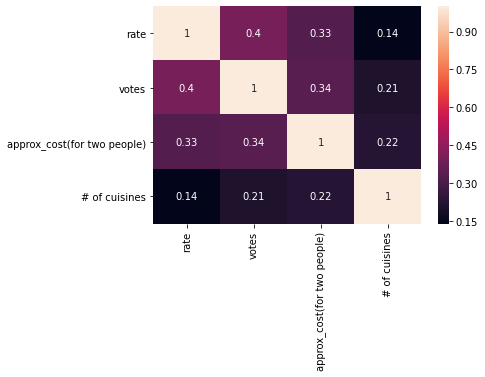

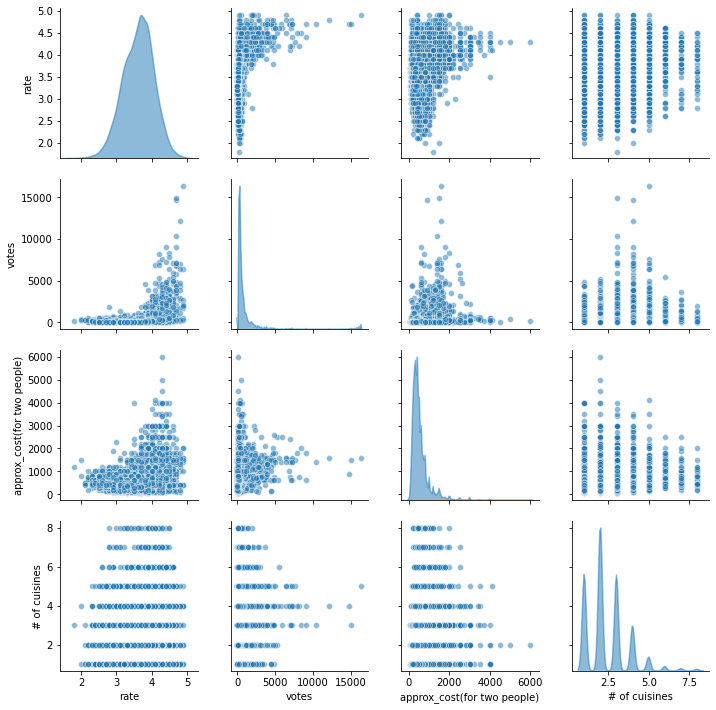

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

data_df_num = data_df[['rate','votes','approx_cost(for two people)','# of cuisines']]

sns.heatmap(data_df_num.corr(), annot=True)
sns.pairplot(data_df_num, diag_kind ='kde', diag_kws={'alpha':0.5}, plot_kws={'alpha':0.5})
plt.show()

__1) What are the top restaurant chains in bangalore?__

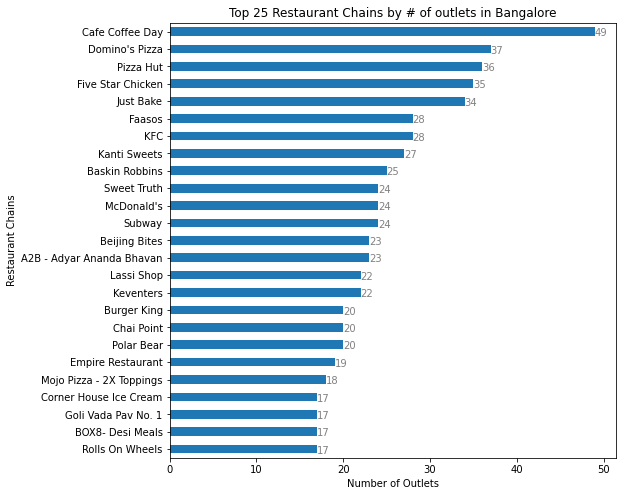

In [20]:
plot = data_df.groupby('name')['address'].count() \
            .sort_values(ascending = False)[:25] \
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))
 
# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), i.get_width(), color='grey')

plot.set_title('Top 25 Restaurant Chains by # of outlets in Bangalore')
plot.set_xlabel('Number of Outlets') 
plot.set_ylabel('Restaurant Chains')
plt.show()

__Our criteria for a Top Rated restaurant:__ # of votes > 250 and rating >= 4

In [21]:
top_rated_count = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4)]['votes'].count()

print('# of Top Rated restaurants in Bangalore:',top_rated_count)

# of Top Rated restaurants in Bangalore: 1241


__2) Where are the top rated restaurants located?__

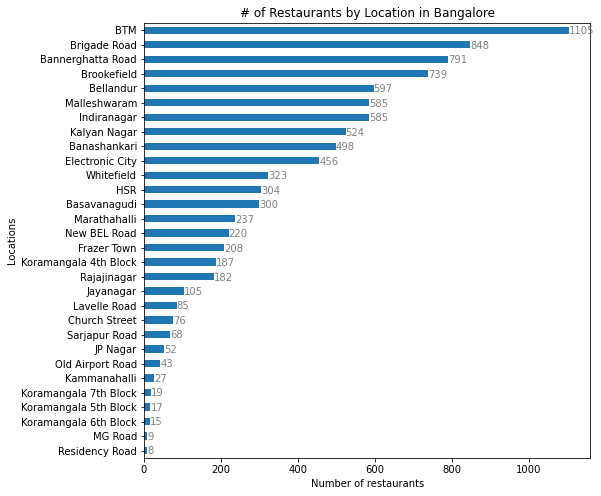

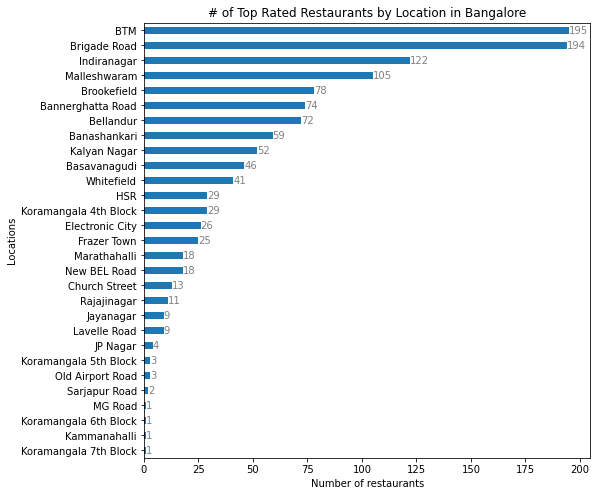

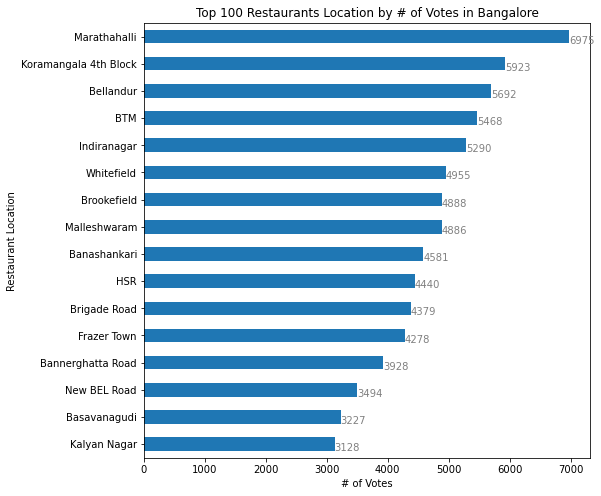

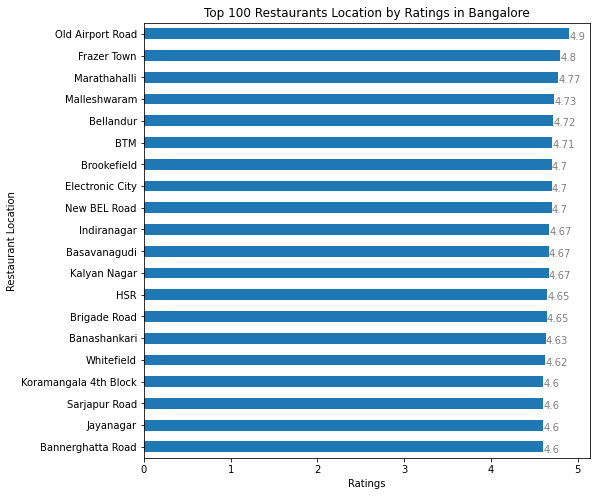

In [22]:
plot = data_df.groupby('listed_in(city)')['address'].count() \
            .sort_values(ascending = False) \
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))
 
# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), i.get_width(), color='grey')

plot.set_title('# of Restaurants by Location in Bangalore')
plot.set_xlabel('Number of restaurants') 
plot.set_ylabel('Locations')
plt.show()

plot = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4)] \
            .groupby('listed_in(city)')['address'].count() \
            .sort_values(ascending = False) \
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))

# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), i.get_width(), color='grey')

plot.set_title('# of Top Rated Restaurants by Location in Bangalore')
plot.set_xlabel('Number of restaurants') 
plot.set_ylabel('Locations')
plt.show()

plot = data_df.sort_values('votes',ascending = False)[:100] \
            .groupby('listed_in(city)')['votes'].mean() \
            .sort_values(ascending = False) \
            .sort_values(ascending = True) \
            .plot(kind='barh',figsize=(8,8))

# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), int(i.get_width()), color='grey')

plot.set_title('Top 100 Restaurants Location by # of Votes in Bangalore')
plot.set_xlabel('# of Votes') 
plot.set_ylabel('Restaurant Location')
plt.show()

plot = data_df.sort_values('rate',ascending = False)[:100] \
            .groupby('listed_in(city)')['rate'].mean() \
            .sort_values(ascending = False) \
            .sort_values(ascending = True) \
            .plot(kind='barh',figsize=(8,8))

# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), round(i.get_width(),2), color='grey')

plot.set_title('Top 100 Restaurants Location by Ratings in Bangalore')
plot.set_xlabel('Ratings') 
plot.set_ylabel('Restaurant Location')
plt.show()

__3) What type of restaurants are more popular?__

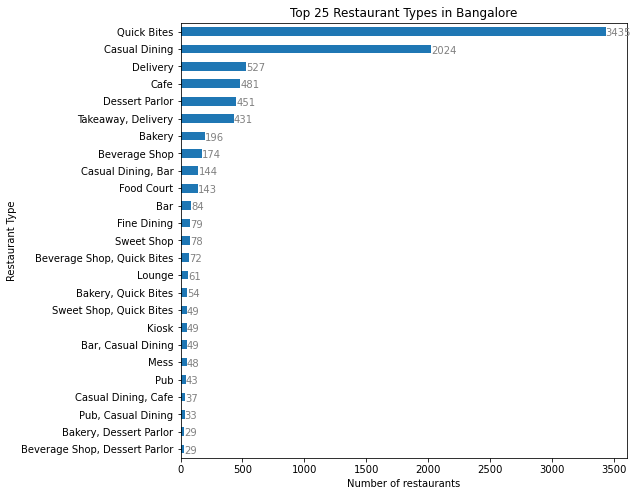

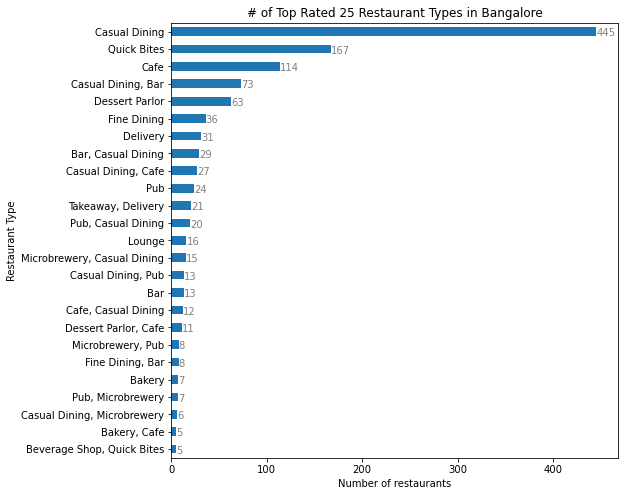

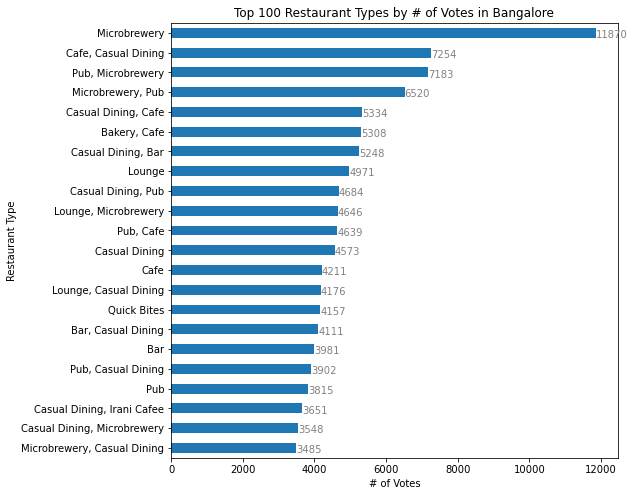

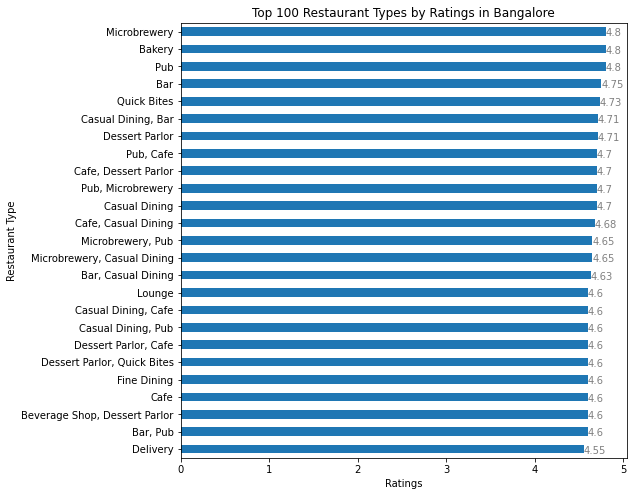

In [23]:
plot = data_df.groupby('rest_type')['address'].count() \
            .sort_values(ascending = False) [:25]\
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))
 
# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), i.get_width(), color='grey')

plot.set_title('Top 25 Restaurant Types in Bangalore')
plot.set_xlabel('Number of restaurants') 
plot.set_ylabel('Restaurant Type')
plt.show()

plot = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4)] \
            .groupby('rest_type')['address'].count() \
            .sort_values(ascending = False)[:25]\
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))

# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), i.get_width(), color='grey')

plot.set_title('# of Top Rated 25 Restaurant Types in Bangalore')
plot.set_xlabel('Number of restaurants') 
plot.set_ylabel('Restaurant Type')
plt.show()

plot = data_df.sort_values('votes',ascending = False)[:100] \
            .groupby('rest_type')['votes'].mean() \
            .sort_values(ascending = False) \
            .sort_values(ascending = True) \
            .plot(kind='barh',figsize=(8,8))

# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), int(i.get_width()), color='grey')

plot.set_title('Top 100 Restaurant Types by # of Votes in Bangalore')
plot.set_xlabel('# of Votes') 
plot.set_ylabel('Restaurant Type')
plt.show()

plot = data_df.sort_values('rate',ascending = False)[:100] \
            .groupby('rest_type')['rate'].mean() \
            .sort_values(ascending = False) \
            .sort_values(ascending = True) \
            .plot(kind='barh',figsize=(8,8))

# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), round(i.get_width(),2), color='grey')

plot.set_title('Top 100 Restaurant Types by Ratings in Bangalore')
plot.set_xlabel('Ratings') 
plot.set_ylabel('Restaurant Type')
plt.show()

__4) What's the average rating of top rated restaurants?__

<U>By Location wise:<U>

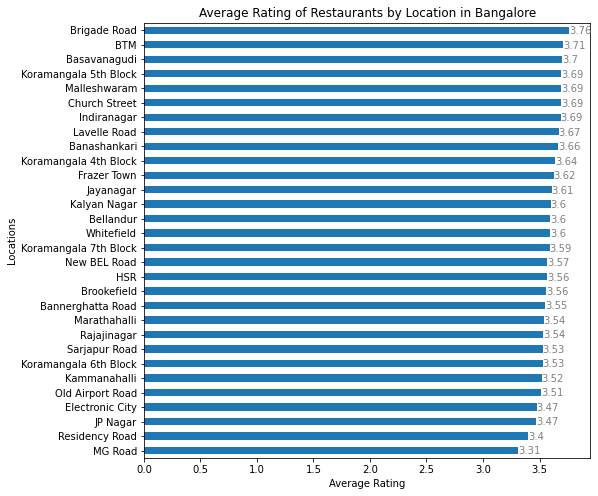

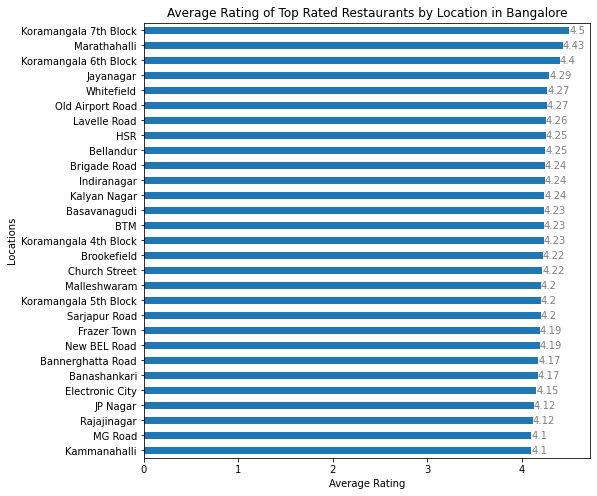

In [24]:
plot = data_df.groupby('listed_in(city)')['rate'].mean() \
            .sort_values(ascending = False) \
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))
 
# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), round(i.get_width(),2), color='grey')

plot.set_title('Average Rating of Restaurants by Location in Bangalore')
plot.set_xlabel('Average Rating') 
plot.set_ylabel('Locations')
plt.show()

plot = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4)] \
            .groupby('listed_in(city)')['rate'].mean() \
            .sort_values(ascending = False)\
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))

# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), round(i.get_width(),2), color='grey')

plot.set_title('Average Rating of Top Rated Restaurants by Location in Bangalore')
plot.set_xlabel('Average Rating') 
plot.set_ylabel('Locations')
plt.show()

<U>By Restaurant Type:<U>

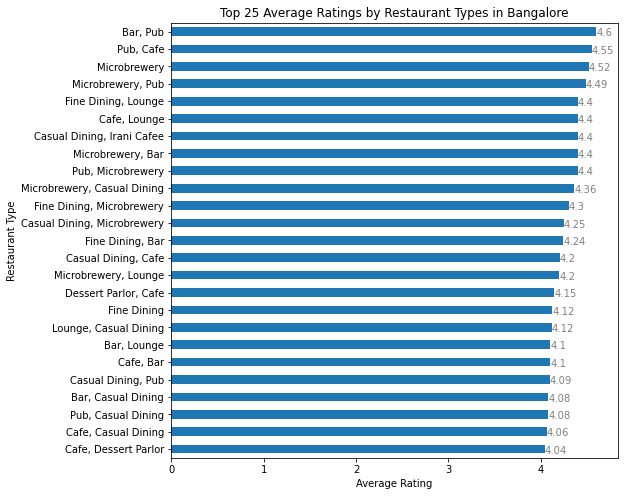

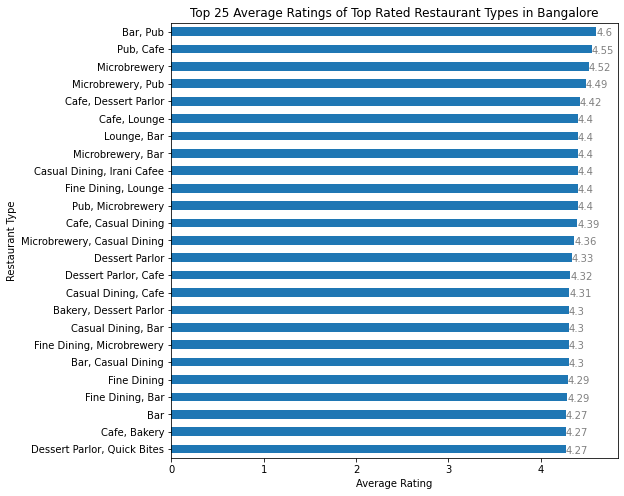

In [25]:
plot = data_df.groupby('rest_type')['rate'].mean() \
            .sort_values(ascending = False) [:25] \
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))
 
# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), round(i.get_width(),2), color='grey')

plot.set_title('Top 25 Average Ratings by Restaurant Types in Bangalore')
plot.set_xlabel('Average Rating') 
plot.set_ylabel('Restaurant Type')
plt.show()

plot = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4)] \
            .groupby('rest_type')['rate'].mean() \
            .sort_values(ascending = False) [:25]\
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))

# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), round(i.get_width(),2), color='grey')

plot.set_title('Top 25 Average Ratings of Top Rated Restaurant Types in Bangalore')
plot.set_xlabel('Average Rating') 
plot.set_ylabel('Restaurant Type')
plt.show()

__5) What is average cost of meal (for 2 patrons) in a successful restaurant?__

<U>By Location wise:<U>

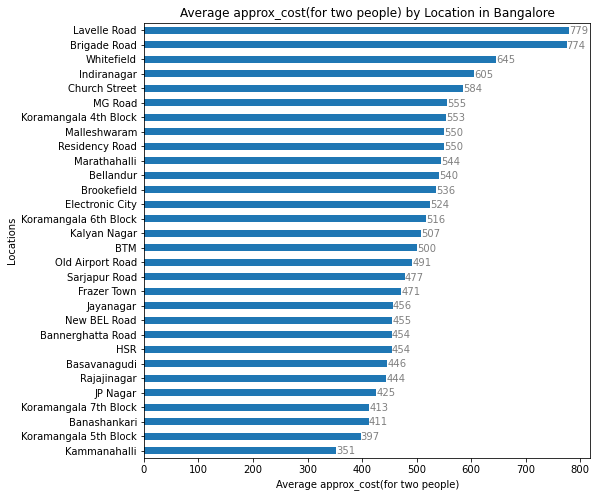

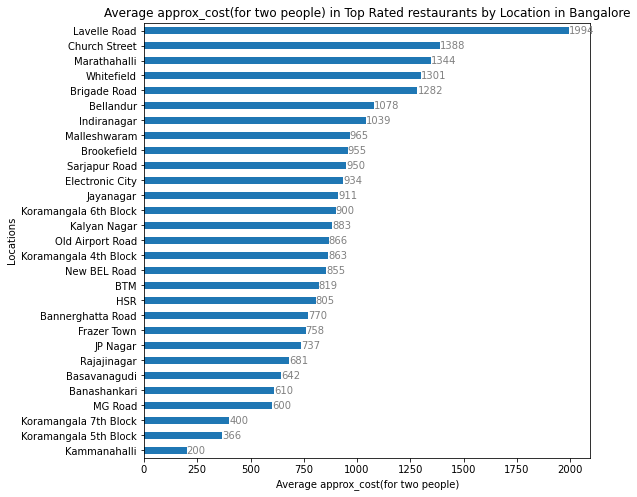

In [26]:
plot = data_df.groupby('listed_in(city)')['approx_cost(for two people)'].mean() \
            .sort_values(ascending = False) \
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))
 
# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), int(i.get_width()), color='grey')

plot.set_title('Average approx_cost(for two people) by Location in Bangalore')
plot.set_xlabel('Average approx_cost(for two people)') 
plot.set_ylabel('Locations')
plt.show()

plot = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4)] \
            .groupby('listed_in(city)')['approx_cost(for two people)'].mean() \
            .sort_values(ascending = False)\
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))

# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), int(i.get_width()), color='grey')

plot.set_title('Average approx_cost(for two people) in Top Rated restaurants by Location in Bangalore')
plot.set_xlabel('Average approx_cost(for two people)') 
plot.set_ylabel('Locations')
plt.show()

<U>By Restaurant Type:<U>

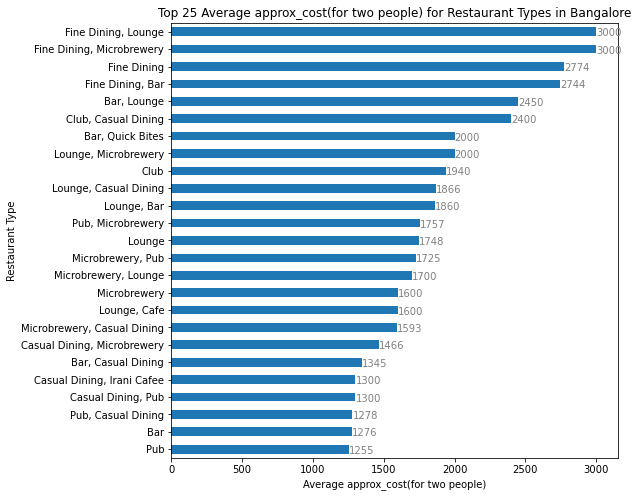

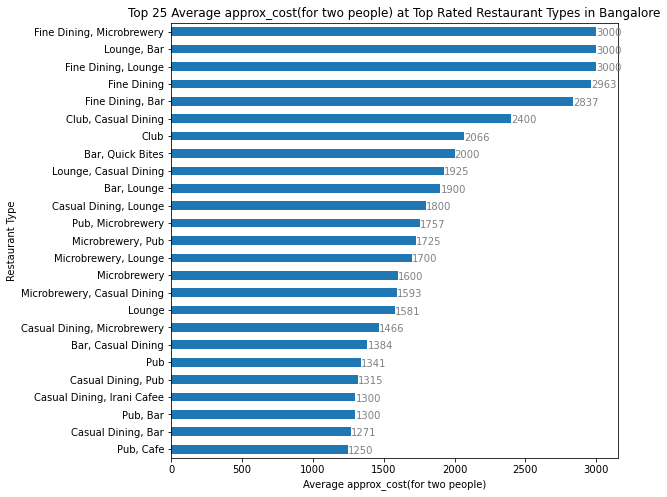

In [27]:
plot = data_df.groupby('rest_type')['approx_cost(for two people)'].mean() \
            .sort_values(ascending = False) [:25]\
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))
 
# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), int(i.get_width()), color='grey')

plot.set_title('Top 25 Average approx_cost(for two people) for Restaurant Types in Bangalore')
plot.set_xlabel('Average approx_cost(for two people)') 
plot.set_ylabel('Restaurant Type')
plt.show()

plot = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4)] \
            .groupby('rest_type')['approx_cost(for two people)'].mean() \
            .sort_values(ascending = False)[:25]\
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))

# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), int(i.get_width()), color='grey')

plot.set_title('Top 25 Average approx_cost(for two people) at Top Rated Restaurant Types in Bangalore')
plot.set_xlabel('Average approx_cost(for two people)') 
plot.set_ylabel('Restaurant Type')
plt.show()

__6) Would an option of online ordering be a critical factor in determining restaurants rating?__

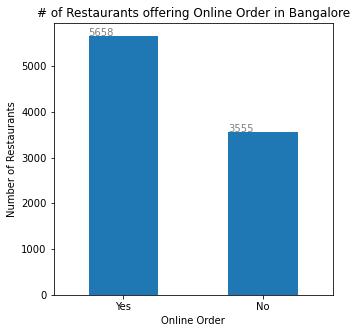

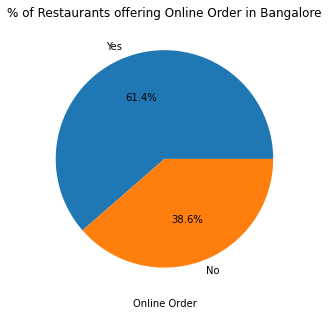

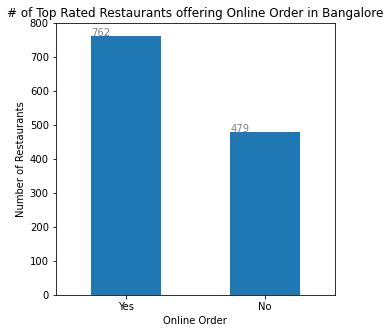

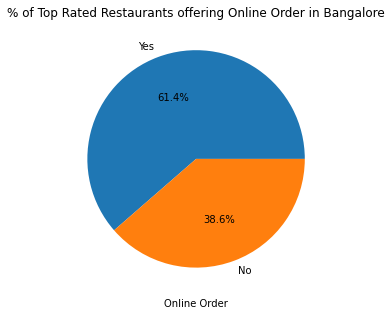

In [28]:
plot = data_df['online_order'].value_counts().plot(kind='bar',figsize=(5,5))

for i in plot.patches:
    plot.text(i.get_x(), i.get_height(), i.get_height(), color='grey')
plt.xticks(rotation=0)
plot.set_title('# of Restaurants offering Online Order in Bangalore')
plot.set_xlabel('Online Order') 
plot.set_ylabel('Number of Restaurants')
plt.show()

plot = data_df['online_order'].value_counts().plot(kind='pie',figsize=(5,5),autopct='%.1f%%')

plot.set_title('% of Restaurants offering Online Order in Bangalore')
plot.set_xlabel('Online Order') 
plot.set_ylabel('')
plt.show()

plot = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4)] ['online_order'] \
              .value_counts().plot(kind='bar',figsize=(5,5))

for i in plot.patches:
    plot.text(i.get_x(), i.get_height(), i.get_height(), color='grey')
    
plt.xticks(rotation=0)
plot.set_title('# of Top Rated Restaurants offering Online Order in Bangalore')
plot.set_xlabel('Online Order') 
plot.set_ylabel('Number of Restaurants')
plt.show()

plot = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4)] ['online_order'] \
              .value_counts().plot(kind='pie',figsize=(5,5),autopct='%.1f%%')

plot.set_title('% of Top Rated Restaurants offering Online Order in Bangalore')
plot.set_xlabel('Online Order') 
plot.set_ylabel('')
plt.show()

<U>By Location:<U>

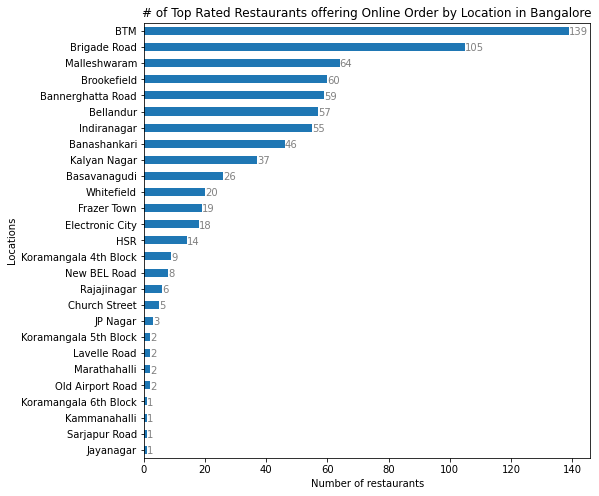

In [29]:
plot = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4) & (data_df['online_order'] == 'Yes')] \
            .groupby('listed_in(city)')['address'].count() \
            .sort_values(ascending = False) \
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))

# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), i.get_width(), color='grey')

plot.set_title('# of Top Rated Restaurants offering Online Order by Location in Bangalore')
plot.set_xlabel('Number of restaurants') 
plot.set_ylabel('Locations')
plt.show()

<U>By Restaurant Type:<U>

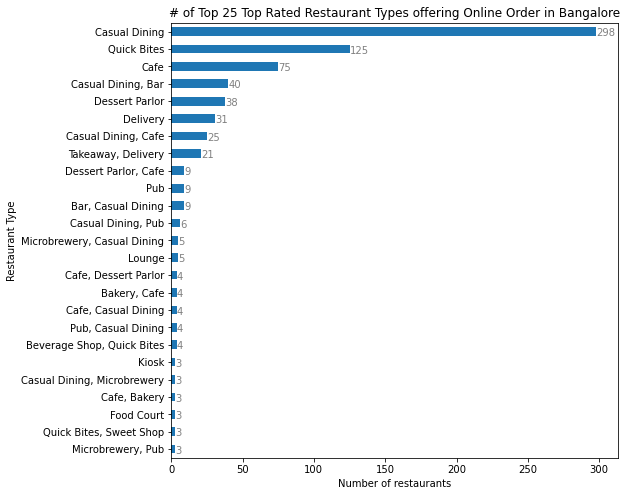

In [30]:
plot = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4) & (data_df['online_order'] == 'Yes')] \
            .groupby('rest_type')['address'].count() \
            .sort_values(ascending = False) [:25]\
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))

# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), i.get_width(), color='grey')

plot.set_title('# of Top 25 Top Rated Restaurant Types offering Online Order in Bangalore')
plot.set_xlabel('Number of restaurants') 
plot.set_ylabel('Restaurant Type')
plt.show()

__7) Would the ability to reserve table at a restaurant contribute to overall restaurant’s success?__

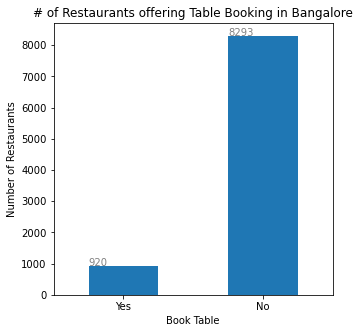

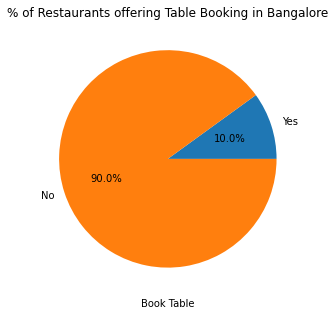

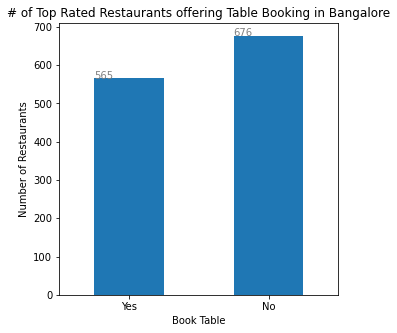

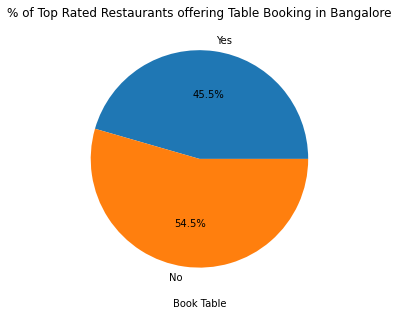

In [31]:
plot = data_df['book_table'].value_counts().sort_values(ascending = True).plot(kind='bar',figsize=(5,5))

for i in plot.patches:
    plot.text(i.get_x(), i.get_height(), i.get_height(), color='grey')
plt.xticks(rotation=0)
plot.set_title('# of Restaurants offering Table Booking in Bangalore')
plot.set_xlabel('Book Table') 
plot.set_ylabel('Number of Restaurants')
plt.show()

plot = data_df['book_table'].value_counts().sort_values(ascending = True).plot(kind='pie',figsize=(5,5),autopct='%.1f%%')

plot.set_title('% of Restaurants offering Table Booking in Bangalore')
plot.set_xlabel('Book Table') 
plot.set_ylabel('')
plt.show()

plot = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4)] ['book_table'] \
              .value_counts().sort_values(ascending = True) \
              .plot(kind='bar',figsize=(5,5))
              
for i in plot.patches:
    plot.text(i.get_x(), i.get_height(), i.get_height(), color='grey')
plt.xticks(rotation=0)
plot.set_title('# of Top Rated Restaurants offering Table Booking in Bangalore')
plot.set_xlabel('Book Table') 
plot.set_ylabel('Number of Restaurants')
plt.show()

plot = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4)] ['book_table'] \
              .value_counts().sort_values(ascending = True) \
              .plot(kind='pie',figsize=(5,5),autopct='%.1f%%')

plot.set_title('% of Top Rated Restaurants offering Table Booking in Bangalore')
plot.set_xlabel('Book Table') 
plot.set_ylabel('')
plt.show()

<U>By Location:<U>

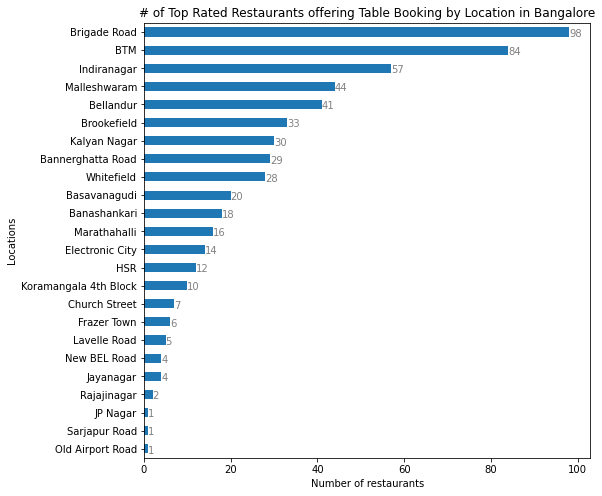

In [32]:
plot = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4) & (data_df['book_table'] == 'Yes')] \
            .groupby('listed_in(city)')['address'].count() \
            .sort_values(ascending = False) \
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))

# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), i.get_width(), color='grey')

plot.set_title('# of Top Rated Restaurants offering Table Booking by Location in Bangalore')
plot.set_xlabel('Number of restaurants') 
plot.set_ylabel('Locations')
plt.show()

<U>By Restaurant Type:<U>

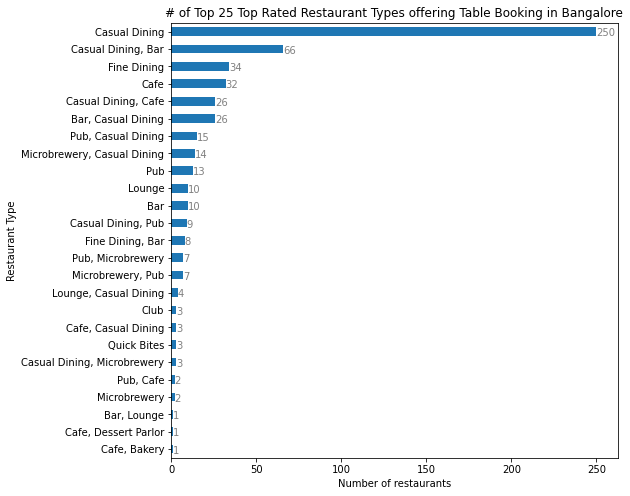

In [33]:
plot = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4) & (data_df['book_table'] == 'Yes')] \
            .groupby('rest_type')['address'].count() \
            .sort_values(ascending = False) [:25]\
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))

# get_width pulls left or right; get_y pushes up or down
for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), i.get_width(), color='grey')

plot.set_title('# of Top 25 Top Rated Restaurant Types offering Table Booking in Bangalore')
plot.set_xlabel('Number of restaurants') 
plot.set_ylabel('Restaurant Type')
plt.show()

__8) What cuisines are the top rated restaurants offering?__

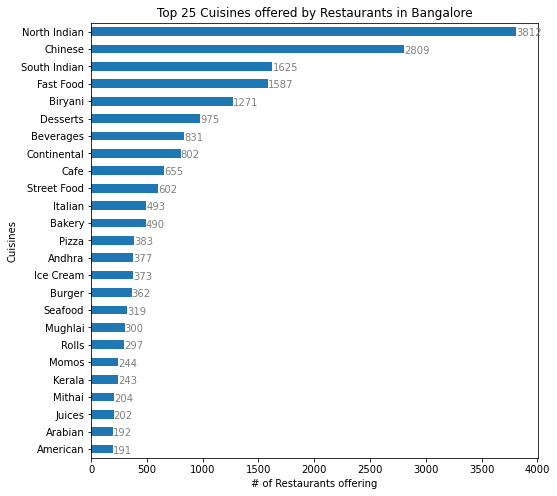

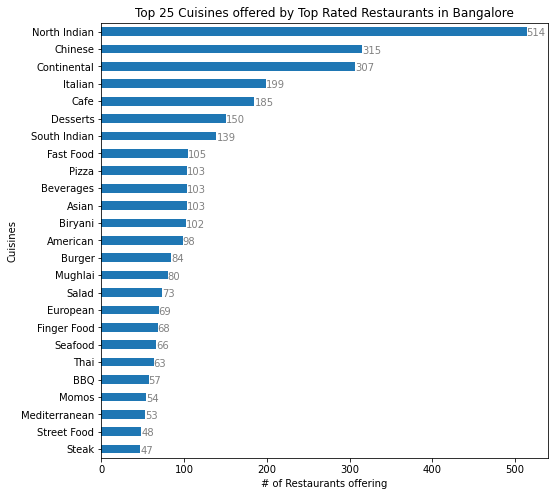

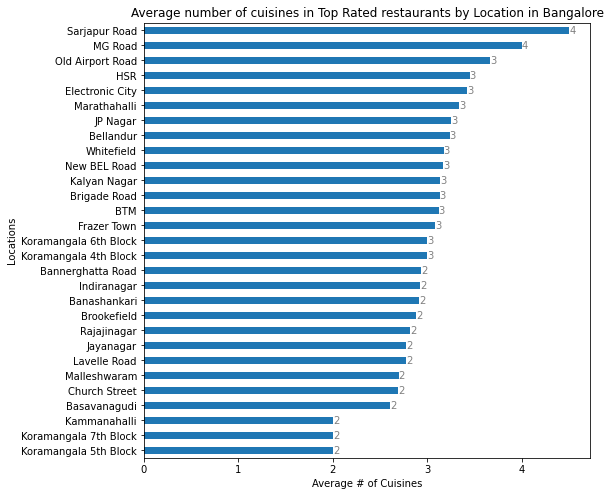

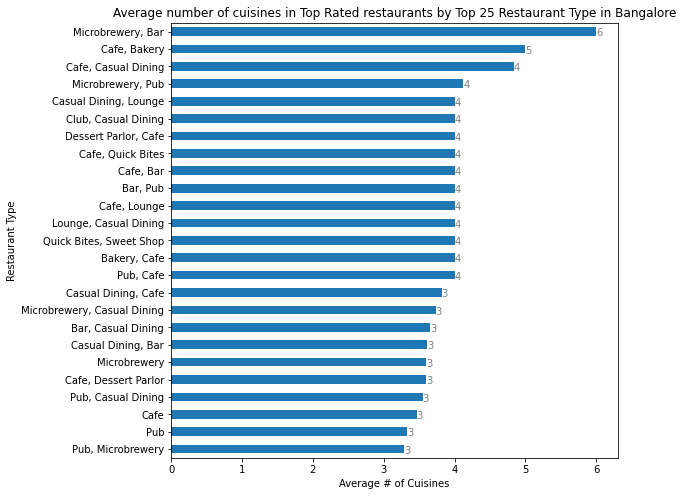

In [34]:
cuisines = []

def cuisines_func(x):
    if(type(x) == list):
        for cuisine in x:
            cuisines.append(cuisine.strip())
            
data_df['cuisines'].str.split(',').apply(cuisines_func)

plot = pd.DataFrame(cuisines,columns=['cuisines']) \
            .groupby('cuisines')['cuisines'].count() \
            .sort_values(ascending = False) [:25]\
            .sort_values(ascending = True) \
            .plot(kind='barh',figsize=(8,8))

for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), round(i.get_width(),2), color='grey')

plot.set_title('Top 25 Cuisines offered by Restaurants in Bangalore')
plot.set_xlabel('# of Restaurants offering') 
plot.set_ylabel('Cuisines')
plt.show()

cuisines = []
data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4)]['cuisines'].str.split(',').apply(cuisines_func)

plot = pd.DataFrame(cuisines,columns=['cuisines']) \
         .groupby('cuisines')['cuisines'].count() \
         .sort_values(ascending = False) [:25]\
         .sort_values(ascending = True) \
         .plot(kind='barh',figsize=(8,8))

for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), round(i.get_width(),2), color='grey')

plot.set_title('Top 25 Cuisines offered by Top Rated Restaurants in Bangalore')
plot.set_xlabel('# of Restaurants offering') 
plot.set_ylabel('Cuisines')
plt.show()

plot = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4)] \
            .groupby('listed_in(city)')['# of cuisines'].mean() \
            .sort_values(ascending = False)\
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))

for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), int(i.get_width()), color='grey')

plot.set_title('Average number of cuisines in Top Rated restaurants by Location in Bangalore')
plot.set_xlabel('Average # of Cuisines') 
plot.set_ylabel('Locations')
plt.show()

plot = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4)] \
            .groupby('rest_type')['# of cuisines'].mean() \
            .sort_values(ascending = False) [:25]\
            .sort_values(ascending = True) \
            .plot(kind='barh', figsize=(8,8))

for i in plot.patches:
    plot.text(i.get_width(), i.get_y(), int(i.get_width()), color='grey')

plot.set_title('Average number of cuisines in Top Rated restaurants by Top 25 Restaurant Type in Bangalore')
plot.set_xlabel('Average # of Cuisines') 
plot.set_ylabel('Restaurant Type')
plt.show()

__9) What makes a restaurant successful?__

<U>Price range and Rating<U>

Text(0, 0.5, 'Rating')

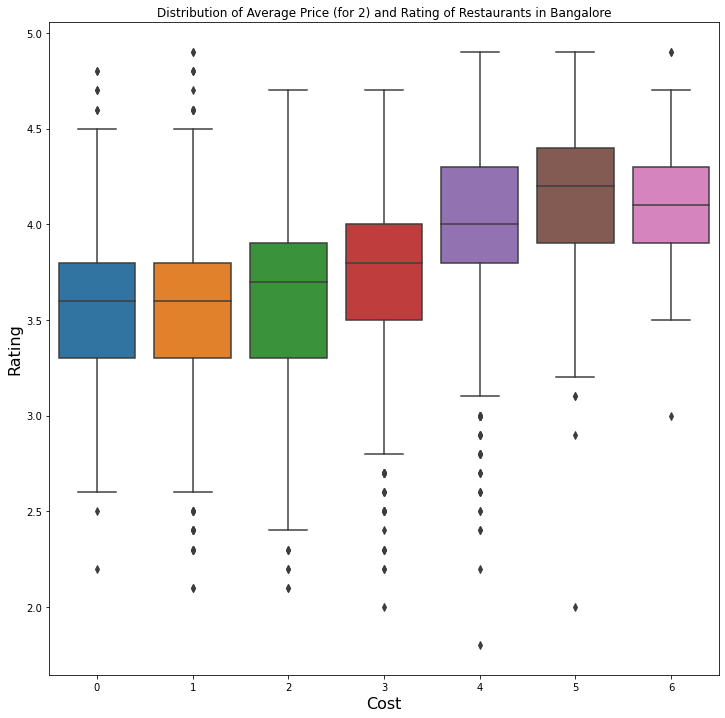

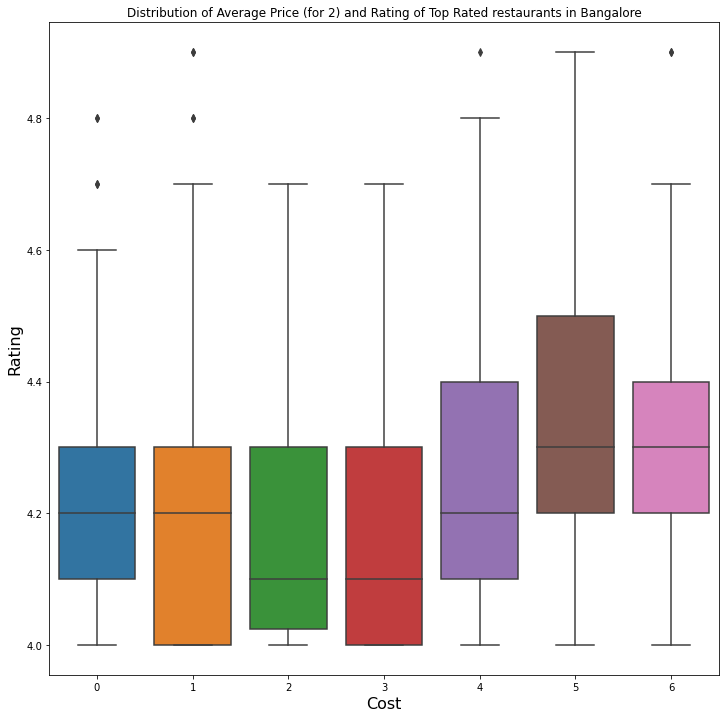

In [35]:
import seaborn as sns

plt.figure(figsize=(12,12))
plot = sns.boxplot(x="cost_cat", y="rate", data=data_df)
plot.set_title('Distribution of Average Price (for 2) and Rating of Restaurants in Bangalore')
plot.set_xlabel('Cost', fontsize=16)
plot.set_ylabel('Rating', fontsize=16)

top_rated = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4)]
            
plt.figure(figsize=(12,12))
plot = sns.boxplot(x="cost_cat", y="rate", data=top_rated)
plot.set_title('Distribution of Average Price (for 2) and Rating of Top Rated restaurants in Bangalore')
plot.set_xlabel('Cost', fontsize=16)
plot.set_ylabel('Rating', fontsize=16)

<U># of Cuisines and Ratings of Restaurants<U>

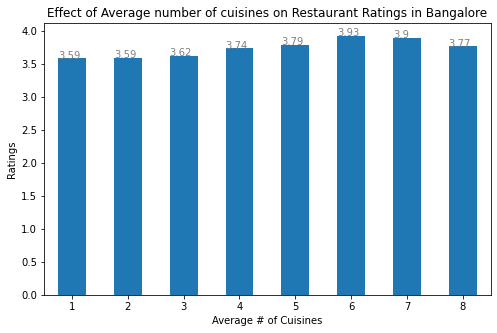

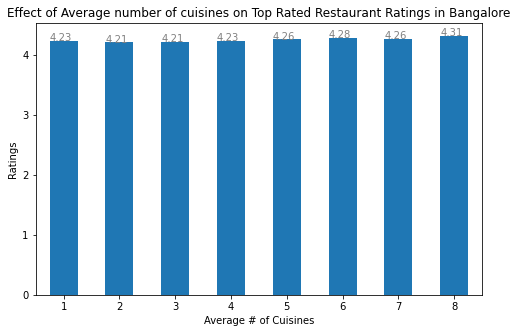

In [36]:
plot = data_df.groupby('# of cuisines')['rate'].mean().plot(kind='bar', figsize=(8,5))

for i in plot.patches:
    plot.text(i.get_x(), i.get_height(), round(i.get_height(),2), color='grey')

plt.xticks(rotation=0)
plot.set_title('Effect of Average number of cuisines on Restaurant Ratings in Bangalore')
plot.set_xlabel('Average # of Cuisines') 
plot.set_ylabel('Ratings')
plt.show()

plot = data_df[(data_df['votes'] > 250) & (data_df['rate'] >= 4)] \
            .groupby('# of cuisines')['rate'].mean() \
            .plot(kind='bar', figsize=(8,5))

for i in plot.patches:
    plot.text(i.get_x(), i.get_height(), round(i.get_height(),2), color='grey')

plt.xticks(rotation=0)
plot.set_title('Effect of Average number of cuisines on Top Rated Restaurant Ratings in Bangalore')
plot.set_xlabel('Average # of Cuisines') 
plot.set_ylabel('Ratings')
plt.show()

What do Customers of Top Rated restaurants say about their Restaurant experience in Reviews?

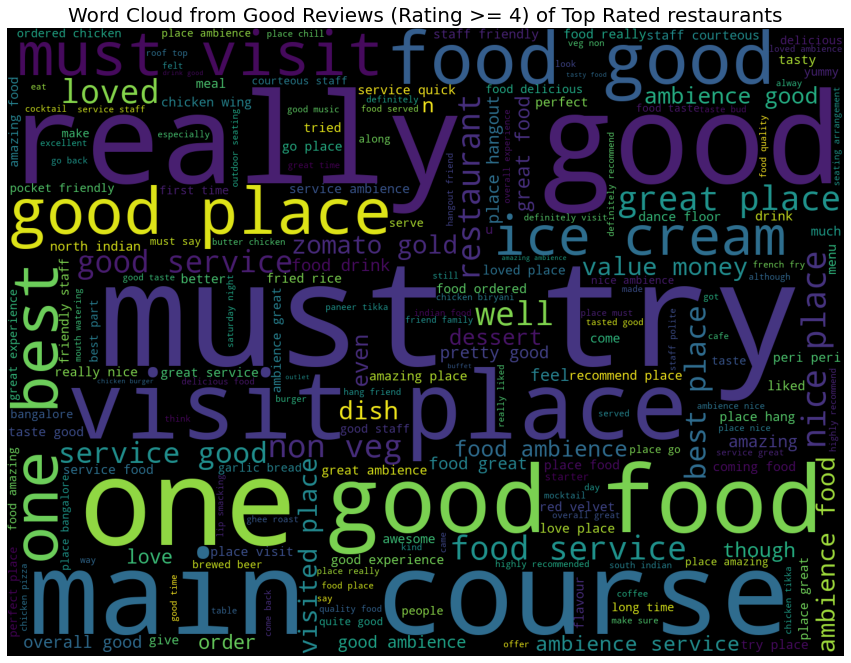

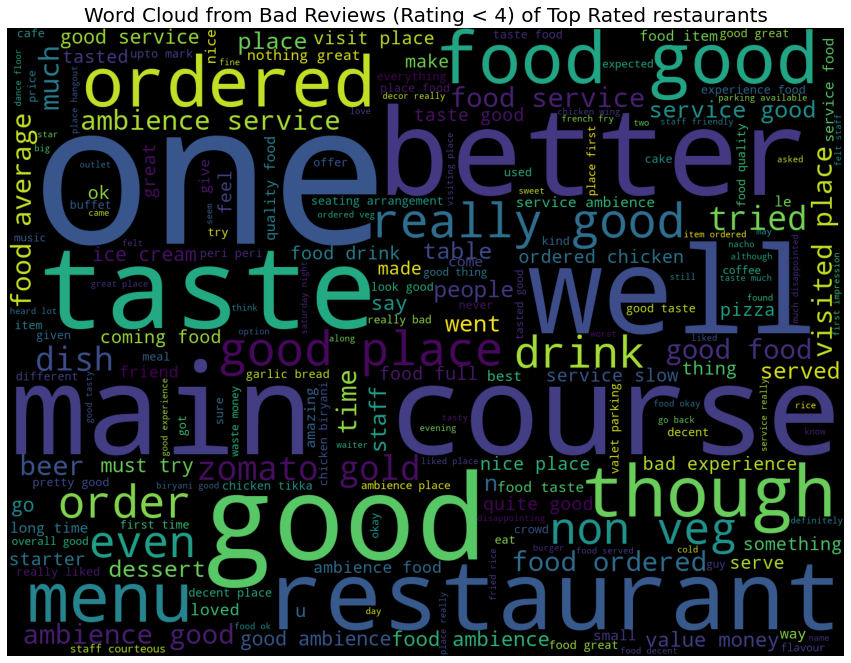

In [37]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=1440, height=1080, relative_scaling=0.5, stopwords = stopwords) \
                     .generate(good_reviews_pp)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud from Good Reviews (Rating >= 4) of Top Rated restaurants',fontsize=20)
plt.show()

wordcloud = WordCloud(width=1440, height=1080, relative_scaling=0.5, stopwords = stopwords)\
                     .generate(bad_reviews_pp)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud from Bad Reviews (Rating < 4) of Top Rated restaurants',fontsize=20)
plt.show()

In [38]:
# Let us one hot encode below variables so that we can use them during model building: 

one_hot_columns = ['rest_type','listed_in(city)','online_order','book_table','cost_cat','votes_cat']
one_hot_prefix = ['type','loc','online_order','book_table','cost','votes']

model_data = pd.get_dummies(data_df, columns = one_hot_columns, prefix = one_hot_prefix, drop_first=True)
model_data.head()

,address,name,rate,votes,cuisines,approx_cost(for two people),reviews_list,# of cuisines,rate_cat,id,cus_African,cus_American,cus_Andhra,cus_Arabian,cus_Asian,cus_Assamese,cus_Australian,cus_Awadhi,cus_BBQ,cus_Bakery,cus_Bar Food,cus_Belgian,cus_Bengali,cus_Beverages,cus_Bihari,cus_Biryani,cus_Bohri,cus_British,cus_Bubble Tea,cus_Burger,cus_Burmese,cus_Cafe,cus_Cantonese,cus_Charcoal Chicken,cus_Chettinad,cus_Chinese,cus_Coffee,cus_Continental,cus_Desserts,cus_Drinks Only,cus_European,cus_Fast Food,cus_Finger Food,cus_French,cus_German,cus_Goan,cus_Greek,cus_Grill,cus_Gujarati,cus_Healthy Food,cus_Hot dogs,cus_Hyderabadi,cus_Ice Cream,cus_Indonesian,cus_Iranian,cus_Italian,cus_Japanese,cus_Jewish,cus_Juices,cus_Kashmiri,cus_Kebab,cus_Kerala,cus_Konkan,cus_Korean,cus_Lebanese,cus_Lucknowi,cus_Maharashtrian,cus_Malaysian,cus_Mangalorean,cus_Mediterranean,cus_Mexican,cus_Middle Eastern,cus_Mithai,cus_Modern Indian,cus_Momos,cus_Mongolian,cus_Mughlai,cus_Naga,cus_Nepalese,cus_North Eastern,cus_North Indian,cus_Oriya,cus_Paan,cus_Pan Asian,cus_Parsi,cus_Pizza,cus_Portuguese,cus_Rajasthani,cus_Raw Meats,cus_Roast Chicken,cus_Rolls,cus_Russian,cus_Salad,cus_Sandwich,cus_Seafood,cus_Sindhi,cus_Singaporean,cus_South American,cus_South Indian,cus_Spanish,cus_Sri Lankan,cus_Steak,cus_Street Food,cus_Sushi,cus_Tamil,cus_Tea,cus_Tex-Mex,cus_Thai,cus_Tibetan,cus_Turkish,cus_Vegan,cus_Vietnamese,cus_Wraps,"type_Bakery, Cafe","type_Bakery, Dessert Parlor","type_Bakery, Food Court","type_Bakery, Quick Bites",type_Bar,"type_Bar, Casual Dining","type_Bar, Lounge","type_Bar, Pub","type_Bar, Quick Bites",type_Beverage Shop,"type_Beverage Shop, Cafe","type_Beverage Shop, Dessert Parlor","type_Beverage Shop, Quick Bites",type_Bhojanalya,type_Cafe,"type_Cafe, Bakery","type_Cafe, Bar","type_Cafe, Casual Dining","type_Cafe, Dessert Parlor","type_Cafe, Food Court","type_Cafe, Lounge","type_Cafe, Quick Bites",type_Casual Dining,"type_Casual Dining, Bar","type_Casual Dining, Cafe","type_Casual Dining, Irani Cafee","type_Casual Dining, Lounge","type_Casual Dining, Microbrewery","type_Casual Dining, Pub","type_Casual Dining, Quick Bites","type_Casual Dining, Sweet Shop",type_Club,"type_Club, Casual Dining",type_Confectionery,type_Delivery,type_Dessert Parlor,"type_Dessert Parlor, Bakery","type_Dessert Parlor, Beverage Shop","type_Dessert Parlor, Cafe","type_Dessert Parlor, Food Court","type_Dessert Parlor, Kiosk","type_Dessert Parlor, Quick Bites","type_Dessert Parlor, Sweet Shop",type_Dhaba,type_Fine Dining,"type_Fine Dining, Bar","type_Fine Dining, Lounge","type_Fine Dining, Microbrewery",type_Food Court,"type_Food Court, Beverage Shop","type_Food Court, Casual Dining","type_Food Court, Dessert Parlor","type_Food Court, Quick Bites",type_Food Truck,type_Kiosk,type_Lounge,"type_Lounge, Bar","type_Lounge, Cafe","type_Lounge, Casual Dining","type_Lounge, Microbrewery",type_Mess,type_Microbrewery,"type_Microbrewery, Bar","type_Microbrewery, Casual Dining","type_Microbrewery, Lounge","type_Microbrewery, Pub",type_Pub,"type_Pub, Bar","type_Pub, Cafe","type_Pub, Casual Dining","type_Pub, Microbrewery",type_Quick Bites,"type_Quick Bites, Bakery","type_Quick Bites, Beverage Shop","type_Quick Bites, Cafe","type_Quick Bites, Dessert Parlor","type_Quick Bites, Food Court","type_Quick Bites, Kiosk","type_Quick Bites, Meat Shop","type_Quick Bites, Mess","type_Quick Bites, Sweet Shop",type_Sweet Shop,"type_Sweet Shop, Quick Bites",type_Takeaway,"type_Takeaway, Delivery",loc_Banashankari,loc_Bannerghatta Road,loc_Basavanagudi,loc_Bellandur,loc_Brigade Road,loc_Brookefield,loc_Church Street,loc_Electronic City,loc_Frazer Town,loc_HSR,loc_Indiranagar,loc_JP Nagar,loc_Jayanagar,loc_Kalyan Nagar,loc_Kammanahalli,loc_Koramangala 4th Block,loc_Koramangala 5th Block,loc_Koramangala 6th Block,loc_Koramangala 7th Block,loc_Lavelle Road,loc_MG Road,loc_Malleshwaram,loc_Marathahalli,loc_New BEL Road,loc_Old Airport Road,loc_Rajajinagar,loc_Residency Road,loc_Sarjapur Road,loc_White

In [39]:
# let us review the variables before proceeding further into model building

model_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9213 entries, 0 to 9212
Data columns (total 238 columns):
address                               9213 non-null object
name                                  9213 non-null object
rate                                  9213 non-null float64
votes                                 9213 non-null float64
cuisines                              9213 non-null object
approx_cost(for two people)           9213 non-null float64
reviews_list                          9213 non-null object
# of cuisines                         9213 non-null int64
rate_cat                              9213 non-null int8
id                                    9213 non-null int64
cus_African                           9213 non-null uint8
cus_American                          9213 non-null uint8
cus_Andhra                            9213 non-null uint8
cus_Arabian                           9213 non-null uint8
cus_Asian                             9213 non-null uint8
cus_Assamese 

In [40]:
# Let us drop below columns. Either they do not add value to the model or already have been one hot encoded

drop_col = ['address','name','votes','cuisines','approx_cost(for two people)','reviews_list','id','rate']
data = model_data.drop(drop_col, axis = 1)

data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9213 entries, 0 to 9212
Data columns (total 230 columns):
# of cuisines                         9213 non-null int64
rate_cat                              9213 non-null int8
cus_African                           9213 non-null uint8
cus_American                          9213 non-null uint8
cus_Andhra                            9213 non-null uint8
cus_Arabian                           9213 non-null uint8
cus_Asian                             9213 non-null uint8
cus_Assamese                          9213 non-null uint8
cus_Australian                        9213 non-null uint8
cus_Awadhi                            9213 non-null uint8
cus_BBQ                               9213 non-null uint8
cus_Bakery                            9213 non-null uint8
cus_Bar Food                          9213 non-null uint8
cus_Belgian                           9213 non-null uint8
cus_Bengali                           9213 non-null uint8
cus_Beverages          

__Model Building & Selection -> Training, Validation, & Testing for Generalization__

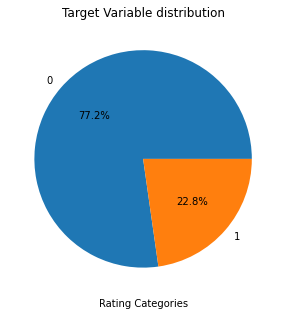

In [41]:
# Let us setup the X data and Y data

x_data = data.drop('rate_cat', axis=1)
y_data = data['rate_cat']

# Let us look at the Target variable distribution

plot = data['rate_cat'].value_counts().plot(kind='pie',figsize=(5,5),autopct='%.1f%%')
plot.set_title('Target Variable distribution')
plot.set_xlabel('Rating Categories') 
plot.set_ylabel('')
plt.show()

data['rate_cat'].value_counts()

# Below are the definitions of the Target variable (Ratings) grouping: 
# 0 -> [0.0, 4.0] 
# 1 -> [4.0, 5.0]

target_dict = {'Ratings 0.0-4.0': 0,
               'Ratings 4.5-5.0': 1}

# Class Imbalance exists in the dataset 
# Any model with accuracy above the baseline accuracy of 77% (majority class %) should be a reasonable model
# Let us proceed as is without using any Under / Over Sampling techniques (for handling class imbalance) 

__Set up the Training, Validation, Test data:__
 - We first split the input data into 2 parts (80% to be used for Train and Validation, 20% for Testing)
 - From the 80% data, we further split into 10% as Validation data and remaining as Training data

Overall ratio: 72% (Train), 8% (Validation), 20% (Test)

In [42]:
from sklearn.model_selection import train_test_split
import numpy as np 

x_train_val, x_test, y_train_val, y_test = \
                    train_test_split(x_data, y_data, test_size = 0.20, stratify = y_data, random_state = 32)

x_train, x_val, y_train, y_val = \
                    train_test_split(x_train_val, y_train_val, test_size = 0.10, stratify = y_train_val, random_state = 32)

print('x_train_val shape                 :', x_train_val.shape)
print('x_train shape                     :', x_train.shape)
print('x_val shape                       :', x_val.shape)
print('x_test shape                      :', x_test.shape)
print('y_train_val shape & target counts : {} {}'.format(y_train_val.shape, np.unique(y_train_val, return_counts = True)))
print('y_train shape & target counts     : {} {}'.format(y_train.shape, np.unique(y_train, return_counts = True)))
print('y_val shape & target counts       : {} {}'.format(y_val.shape, np.unique(y_val, return_counts = True)))
print('y_test shape & target counts      : {} {}\n'.format(y_test.shape, np.unique(y_test, return_counts = True)))

x_train_val shape                 : (7370, 229)
x_train shape                     : (6633, 229)
x_val shape                       : (737, 229)
x_test shape                      : (1843, 229)
y_train_val shape & target counts : (7370,) (array([0, 1], dtype=int8), array([5693, 1677], dtype=int64))
y_train shape & target counts     : (6633,) (array([0, 1], dtype=int8), array([5124, 1509], dtype=int64))
y_val shape & target counts       : (737,) (array([0, 1], dtype=int8), array([569, 168], dtype=int64))
y_test shape & target counts      : (1843,) (array([0, 1], dtype=int8), array([1424,  419], dtype=int64))



__1) Simple Neural Network:__
 - Let us define a Simple Neural Network with 2 hidden layers
 - Relu is used for activation in dense layers and a sigmoid activation for the output node
 - Control overfitting by: 
   - Introducing drop out layer after the dense layer 
   - Using L1 and L2 regularization 
 - Binary cross entropy is the loss function as target variable has 2 outcomes 
 - Accuracy is the metric that is being tracked 

In [54]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

# Below function will define the simple Neural Network that accepts necessary parameters that can be configured:

def train_model(x_train, y_train, x_val, y_val, num_hidden_units_1, num_hidden_units_2, epochs, batch_size, learning_rate):
    model_snn = models.Sequential()
    model_snn.add(layers.Dense(num_hidden_units_1, activation = 'relu', input_shape = ((x_train.shape[1],)),
                           kernel_regularizer = regularizers.l1_l2(l1=0.001, l2=0.001)))
                           #kernel_regularizer = regularizers.l1(0.00001)))
    model_snn.add(layers.Dropout(0.5))
    model_snn.add(layers.Dense(num_hidden_units_2, activation = 'relu', 
                           kernel_regularizer = regularizers.l1_l2(l1=0.001, l2=0.001)))
                           #kernel_regularizer = regularizers.l1(0.00001)))
    model_snn.add(layers.Dropout(0.5))
    model_snn.add(layers.Dense(1, activation = 'sigmoid'))
    model_snn.summary()
    
    model_snn.compile(loss = 'binary_crossentropy', 
                  optimizer = optimizers.RMSprop(lr = learning_rate), 
                  metrics = ['accuracy'])
    
    history_snn = model_snn.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                                validation_data = (x_val, y_val))
    return (history_snn, model_snn)

# Plot the Learning curves for Loss and Accuracy for Training and Validation

def plot_learning(history): 
    # Plot the Loss curve 
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'bo', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()   # clear figure

    # Plot the Accuracy curve 
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'bo', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Display the Confusion Matrix and Classification Report:

from sklearn.metrics import confusion_matrix, classification_report

def print_metrics(model, x_test, y_test, target_dict): 
    y_test_pred = model.predict_classes(x_test)
    print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_test_pred))
    print('\nClassification Report:\n ', classification_report(y_test, y_test_pred, target_names = target_dict))

__Steps__:
 - Train the model and plot learning curves (for loss and accuracy) for Training and Validation data
 - Evaluate the model performance against Test data
   - Display the Test loss and Accuracy
   - Display the Confusion Matrix & Classification Report

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                14720     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 15,777
Trainable params: 15,777
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
52/52 [==============================] - 1s 14ms/step - loss: 1.4416 - accuracy: 0.7443 - val_loss: 1.065

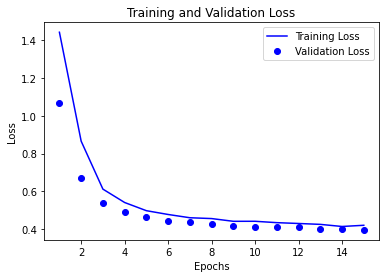

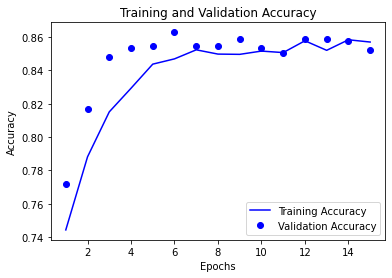

Training Loss & Accuracy: 
208/208 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8714

Validation Loss & Accuracy: 
24/24 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8521

Test Loss & Accuracy: 
58/58 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8654

Confusion Matrix:
 [[1361   63]
 [ 185  234]]

Classification Report:
                   precision    recall  f1-score   support

Ratings 0.0-4.0       0.88      0.96      0.92      1424
Ratings 4.5-5.0       0.79      0.56      0.65       419

       accuracy                           0.87      1843
      macro avg       0.83      0.76      0.79      1843
   weighted avg       0.86      0.87      0.86      1843



In [55]:
# Tune the hyper parameters -> hidden units in both layers, epochs, batch size, learning rate
# For updating the L1, L2 regulalizer or drop out values, update in the function where the model is defined

history_snn, model_snn = train_model(x_train, y_train, x_val, y_val, num_hidden_units_1 = 64, num_hidden_units_2 = 16, 
                         epochs = 15, batch_size = 128, learning_rate = 0.001)

plot_learning(history_snn)

print('Training Loss & Accuracy: ') 
model_snn.evaluate(x_train, y_train)

print('\nValidation Loss & Accuracy: ')
model_snn.evaluate(x_val, y_val)

# Evalaute the model on Test data for generalization 
print('\nTest Loss & Accuracy: ')
model_snn.evaluate(x_test, y_test)

print_metrics(model_snn, x_test, y_test, target_dict)

__Build traditional Machine Learning models:__
 - Train the model 
 - Determine Training and Test Accuracy 
 - Predict on Test data and display the Confusion Matrix and Classification Report

In [45]:
def build_ml_model(x_train, y_train, x_val, y_val, x_test, y_test, target_dict, model):
    model.fit(x_train, y_train)
    train_acc = model.score(x_train, y_train)
    val_acc = model.score(x_val, y_val)
    test_acc = model.score(x_test, y_test)

    print('Train Accuracy      : %.2f' % train_acc)
    print('Validation Accuracy : %.2f' % val_acc)
    print('Test Accuracy       : %.2f' % test_acc)

    y_test_pred = model.predict(x_test)

    print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_test_pred))
    print('\nClassification Report:\n ', classification_report(y_test, y_test_pred, target_names = target_dict))
    
    return (model)

__2) Logistic Regression model (using Cross Validation):__
 - Tune the hyper parameters as required to improve model performance
     - C parameter -> Inverse of regularization strength, smaller values specify stronger regularization
     - Class weights -> to handle for class imbalance 

In [46]:
from sklearn.linear_model import LogisticRegressionCV

model_lr = LogisticRegressionCV(cv = 5, max_iter = 1000, random_state = 32, n_jobs = -1, 
                                class_weight = [None, 'balanced'], Cs = np.logspace(-10, -1, 10))

model_lr = build_ml_model(x_train, y_train, x_val, y_val, x_test, y_test, target_dict, model_lr)

Train Accuracy      : 0.88
Validation Accuracy : 0.86
Test Accuracy       : 0.87

Confusion Matrix:
 [[1360   64]
 [ 179  240]]

Classification Report:
                   precision    recall  f1-score   support

Ratings 0.0-4.0       0.88      0.96      0.92      1424
Ratings 4.5-5.0       0.79      0.57      0.66       419

       accuracy                           0.87      1843
      macro avg       0.84      0.76      0.79      1843
   weighted avg       0.86      0.87      0.86      1843



__3) Random Forest Classifier:__
 - Tune the hyper parameters as required to improve model performance

In [47]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_jobs = -1, random_state = 32, oob_score = 'True', criterion = 'entropy', 
                                  n_estimators = 200, max_depth = 6, max_features = 50)
                                  
model_rf = build_ml_model(x_train, y_train, x_val, y_val, x_test, y_test, target_dict, model_rf)

Train Accuracy      : 0.87
Validation Accuracy : 0.86
Test Accuracy       : 0.87

Confusion Matrix:
 [[1385   39]
 [ 209  210]]

Classification Report:
                   precision    recall  f1-score   support

Ratings 0.0-4.0       0.87      0.97      0.92      1424
Ratings 4.5-5.0       0.84      0.50      0.63       419

       accuracy                           0.87      1843
      macro avg       0.86      0.74      0.77      1843
   weighted avg       0.86      0.87      0.85      1843



__4) XG Boost Classifier:__
 - Tune the hyper parameters as required to improve model performance
   - learning_rate: After each boosting step, gets the weights of new features and shrinks the feature weights to make the          boosting process more conservative, thus controlling overfitting

In [48]:
from xgboost import XGBClassifier

model_xgbc = XGBClassifier(n_jobs = -1, random_state = 32, verbosity = 0, 
                           n_estimators = 100, max_depth = 5, learning_rate = 0.01)
                                  
model_xgbc = build_ml_model(x_train, y_train, x_val, y_val, x_test, y_test, target_dict, model_xgbc)

Train Accuracy      : 0.88
Validation Accuracy : 0.86
Test Accuracy       : 0.87

Confusion Matrix:
 [[1368   56]
 [ 185  234]]

Classification Report:
                   precision    recall  f1-score   support

Ratings 0.0-4.0       0.88      0.96      0.92      1424
Ratings 4.5-5.0       0.81      0.56      0.66       419

       accuracy                           0.87      1843
      macro avg       0.84      0.76      0.79      1843
   weighted avg       0.86      0.87      0.86      1843



__Summary of Model peformance:__
 - Score all the models for Training, Validation and Test data
 - Load the results into a Dataframe and display the results sorted by Test accuracy 

In [56]:
models = {'Simple Neural Network': model_snn, 
          'Logistic Regression': model_lr, 
          'Random Forest Classifier': model_rf, 
          'XGBoost Classifier': model_xgbc}

def model_score(x, y, model_name, model): 
    if model_name == 'Simple Neural Network': 
        loss, accuracy = model.evaluate(x, y)
    else: 
        accuracy = model.score(x, y)
    return (accuracy)

results = []

for model_name, model in models.items():
    accuracy_train = model_score(x_train, y_train, model_name, model)
    accuracy_val = model_score(x_val, y_val, model_name, model)
    accuracy_test = model_score(x_test, y_test, model_name, model) 
    results.append([model_name, accuracy_train, accuracy_val, accuracy_test])

column = ['Model name', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']

df_results = pd.DataFrame(results, columns = column)
df_results.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)
df_results.reset_index(drop = True, inplace = True)
df_results.round(2)

58/58 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8654


,Model name,Training Accuracy,Validation Accuracy,Test Accuracy
0,XGBoost Classifier,0.88,0.86,0.87
1,Logistic Regression,0.88,0.86,0.87
2,Simple Neural Network,0.87,0.85,0.87
3,Random Forest Classifier,0.87,0.86,0.87


__Conclusion__: 
 - Overall accuracies of all the models are similar
 - All our models are performing better than the baseline frequency of 77% (based on majority class % in target variable) 
 - Although XG Boost classifier is marginally better than other models, we would chose any of the top 3 models as their Test data F1 score for both classes of target variable are identical

__References__: 

We built our code referring to below sources and based on our learnings from current course, Data Science and Neural Network classes.

 - https://github.com/poddarhimanshu/Coursera_Capstone/blob/master/Final%20Project/Final%20Project%20Notebook/EDA%20and%20Project%20Notebook.ipynb
 - From various sites / blogs based on Google search 

__Recommendations__:

 - Recommendation 1: 
    - Location: Lavelle Road
    - Restaurant Type: Microbrewery/Fine Dining
    - Number of cuisines: 4 or more (up to 6)
    - Cuisines: North Indian/Chinese/South Indian/Continental/Italian/Fast Food 
    - Online ordering: Yes
    - Table reservation: Yes
    - Average cost per meal (for two people): INR 1750 


 - Recommendation 2:	
    - Location: Marthahalli
    - Restaurant Type: Microbrewery/Fine Dining
    - Number of cuisines: 4 or more (up to 6)
    - Online Ordering: Yes
    - Table reservation: Yes
    - Cuisines: North Indian/Chinese/South Indian/Continental/Italian/Fast Food
    - Average cost per meal (for two people): INR 1300 